In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
import yfinance as yf

# Fetch historical stock data for Apple (AAPL) and SPY
stock_data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30", group_by="ticker")

print(stock_data.columns)

# Check the first few rows
print(stock_data.head())


[*********************100%***********************]  2 of 2 completed

MultiIndex([('AAPL',      'Open'),
            ('AAPL',      'High'),
            ('AAPL',       'Low'),
            ('AAPL',     'Close'),
            ('AAPL', 'Adj Close'),
            ('AAPL',    'Volume'),
            ( 'SPY',      'Open'),
            ( 'SPY',      'High'),
            ( 'SPY',       'Low'),
            ( 'SPY',     'Close'),
            ( 'SPY', 'Adj Close'),
            ( 'SPY',    'Volume')],
           names=['Ticker', 'Price'])
Ticker           AAPL                                                         \
Price            Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2017-01-03  28.950001  29.082500  28.690001  29.037500  26.891960  115127600   
2017-01-04  28.962500  29.127501  28.937500  29.004999  26.861864   84472400   
2017-01-05  28.980000  29.215000  28.952499  29.152500  26.998465   88774400   
2017-01-06  29.195000  29.540001  29.117500  29.477501  27.29

<Figure size 1000x600 with 0 Axes>

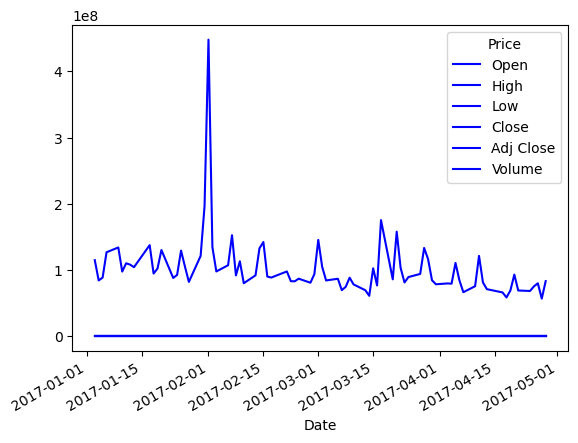

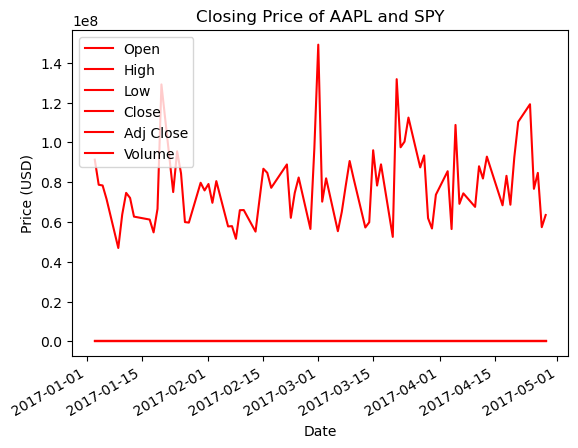

In [6]:
import matplotlib.pyplot as plt
# Check for missing values
stock_data.isnull().sum()

# Plot the closing price of AAPL and SPY over time
plt.figure(figsize=(10, 6))
stock_data['AAPL'].plot(label='AAPL', color='blue')
stock_data['SPY'].plot(label='SPY', color='red')
plt.title('Closing Price of AAPL and SPY')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()



In [8]:
# Create lagged features for 'AAPL' Close price (previous day's closing price)
stock_data['Prev_Close_AAPL'] = stock_data[('AAPL', 'Close')].shift(1)

# Drop rows with NaN values (due to shifting)
stock_data = stock_data.dropna()

# Create features and labels for 'AAPL'
X = stock_data[['Prev_Close_AAPL']]  # Features: Previous day's closing price for AAPL
y = stock_data[('AAPL', 'Close')]  # Labels: Today's closing price for AAPL


In [11]:
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the data
X_train.shape, X_test.shape


((64, 1), (16, 1))

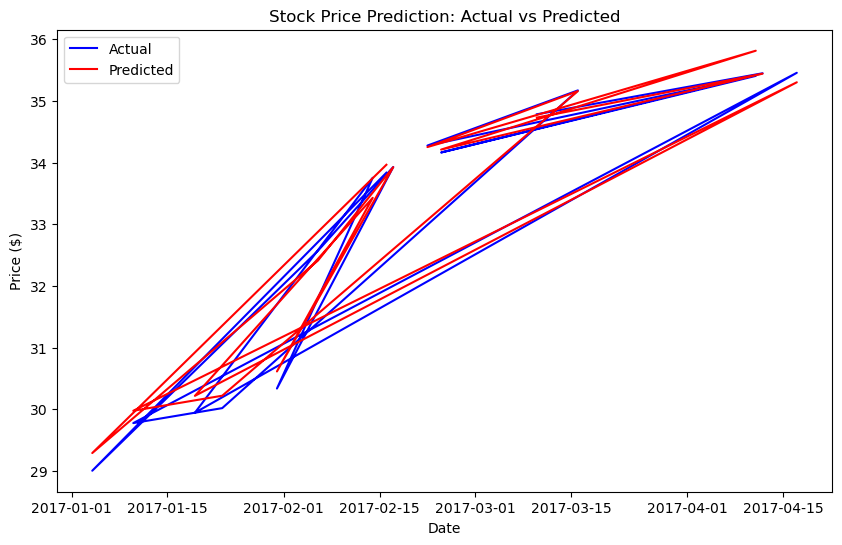

In [13]:
from sklearn.linear_model import LinearRegression


# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.title('Stock Price Prediction: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np


# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 0.041111104802416726
Root Mean Squared Error: 0.20275873545279555
